# Shortest Hamiltonian path problem

Shortest Hamiltonian path problem is a little simpler version of the problem __Travelling Salesman Problem (TSP)__
where we are not looking for a __cycle__ passing through all the nodes (cities) and we are satisfied with the shortest __path__ connecting all cities. We don't have to go back to the start city.

There are N cities. Given is a distance matrix M=NxN, where $M[i][j]$ is a distance from the i-th to the j-th city.
In this exercise, we consider a symmetrical variant of shortest Hamiltonian path problem, i.e., $M[i][j] = M[j][i]$. Furthermore, $M[i][i] = 0$.
The objective is to find the __shortest path traversing through each city once__. In other words: <br> Let s=[3,1,...,5] be some N-element permutation of indices. We want to find such a permutation that $\sum_{k=2,...,N}M[s[k-1]][s[k]]$ is optimal (minimal).

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

# Part 1: Evolutionary algorithm

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
%matplotlib inline

### 1.1) Evaluation

Complete the below function. It should evaluate an input solution (decision vector, vector of indices) in terms of TSP distance criterion. M is a distance matrix. Return the computed total distance.

In [2]:
def getEvaluation(solution, M):
    distance = 0.0
    for i in range(1, len(solution)):
        distance += M[solution[i]][solution[i-1]]
    distance += M[solution[0]][solution[len(solution)-1]]

    return distance

M = cm.getTutorialDistanceMatrix() ### 6 CITIES
print(getEvaluation([0,1,2,3,4,5], M)) ### SHOULD BE 236.28
print(getEvaluation([5,4,3,2,1,0], M)) ### SHOULD BE THE SAME, IT IS A CYCLE :)
print(getEvaluation([0,2,1,3,5,4], M))

236.28476553372587
236.28476553372587
363.3878692639945


### 1.2) Validation

This function can be used to validate the solution, i.e., to check if a given solution vector is of a proper size and to check if each element is unique.

In [3]:
def isValid(solution, cities):
    if len(solution) != cities: return False
    s = set(solution)
    e = set([i for i in range(cities)])
    if s==e: return True
    else: return False
    
print(isValid([0,1,2,3,4,5,6], 6)) # FALSE
print(isValid([0,1,2,3,4,5], 6)) # TRUE
print(isValid([0,1,2,3,4,5,5], 6)) # FALSE
print(isValid([0,1,1,2,3,2], 6)) # FALSE

False
True
False
False


### 1.3) Initialization

We need to create a population of solutions. These solutions - initially - can be generated randomly. 
Firstly, complete getRandomSolution function (cities = the number of cities considered in the TSP problem).
It should generate a random permutation of [0,1,...,cities] vector. You can use np.random.shuffle function. Then, 
finish getInitialPopulation method. It should return a populationSize-element vector of pairs [distance, solution], where a solution is a random permutation of indices, and distance = the total distance (solution evaluation). 

In [4]:
def getRandomSolution(cities):
    np.random.shuffle(cities)
    return cities

def getInitialPopulation(populationSize, cities, M):
    population = []
    trivial = [i for i in range(cities)]
    for i in range(populationSize):
        solution = getRandomSolution(trivial)
        if not isValid(solution, cities):
            raise Exception("solution not valid")
        population.append((getEvaluation(solution, M), copy.deepcopy(solution)))
    return population

def printPopulation(population):
    for s in population:
        print(str(s[0]) + " : " + str(s[1]))

population = getInitialPopulation(10, 6, M)
printPopulation(population)

368.02074819442726 : [2, 0, 1, 3, 4, 5]
433.41101536534984 : [0, 3, 1, 5, 2, 4]
295.29100312907104 : [4, 3, 2, 0, 5, 1]
251.3037849617194 : [0, 1, 2, 3, 5, 4]
397.7302492684498 : [2, 0, 5, 1, 3, 4]
247.50867124638637 : [5, 3, 2, 1, 4, 0]
348.7028788308643 : [0, 1, 4, 2, 5, 3]
295.2910031290711 : [0, 5, 1, 4, 3, 2]
299.0861168444041 : [5, 1, 0, 2, 3, 4]
271.6017053851075 : [1, 4, 5, 3, 2, 0]


### 1.4) Sort population

The below function should sort the population according to the distance, i.e., according to the first element of each pair. These should be ordered from the smallest to the largest.You can use .sort method and a lambda function.

In [5]:
def sortPopulation(population):
    population.sort()

sortPopulation(population)
printPopulation(population)

247.50867124638637 : [5, 3, 2, 1, 4, 0]
251.3037849617194 : [0, 1, 2, 3, 5, 4]
271.6017053851075 : [1, 4, 5, 3, 2, 0]
295.29100312907104 : [4, 3, 2, 0, 5, 1]
295.2910031290711 : [0, 5, 1, 4, 3, 2]
299.0861168444041 : [5, 1, 0, 2, 3, 4]
348.7028788308643 : [0, 1, 4, 2, 5, 3]
368.02074819442726 : [2, 0, 1, 3, 4, 5]
397.7302492684498 : [2, 0, 5, 1, 3, 4]
433.41101536534984 : [0, 3, 1, 5, 2, 4]


### 1.5) Summarize the population

The below function should compute minimum, mean, and maximum value of the total distances of solutions in the population. Return these statistics as [min, mean, max] vector. 

In [6]:
def getStats(population):
    minimum = np.inf
    maximum = 0.0
    sum = 0.0
    for d, s in population:
        sum += d
        if d < minimum:
            minimum = d
        if d > maximum:
            maximum = d
    return [minimum, sum/len(population), maximum]

print(getStats(population))

[247.50867124638637, 320.7947176354851, 433.41101536534984]


### 1.6) Tournament selection of size K

You are asked to implement a tournament for parent selection (it is assumed that the population is already sorted). Firstly, complete getTournamentSelection method. It should return index corresponding to selected parent solution. Simply generate K random integers from [0,...,populationSize] and select the smallest index (as the solutions are ordered from the best to the worst). Repeat this process twice and return a vector [index1, index2]. Then, complete getMatingPool method. Usually, matingPoolSize = population size, i.e., we wish to generate an offspring population of size populationSize and thus we need to select such many pairs of parent solutions. This metod should return a vector of these pairs, e.g., [[2, 5], [9, 2], ..., [5, 7]]. 

In [7]:
def getTournamentSelection(populationSize, size):
    contestants = random.sample(range(0, populationSize), size)
    return min(contestants)
    
def getParentIndices(populationSize, K):
    parents = []
    parents.append(getTournamentSelection(populationSize, size=K))
    p2 = getTournamentSelection(populationSize, K)
    while p2 == parents[0]:
        p2 = getTournamentSelection(populationSize, K)
    parents.append(p2)
    return parents
    
def getMatingPool(matingPoolSize, populationSize, K):
    matingPool = []
    for i in range(matingPoolSize):
        matingPool.append(getParentIndices(populationSize, K))
    return matingPool
     
matingPool = getMatingPool(10, 10, 2)
print(matingPool)

[[1, 3], [2, 1], [2, 4], [6, 3], [1, 3], [0, 8], [0, 1], [5, 0], [3, 0], [6, 0]]


## Remark regards "the same parents" problem
We spent about 20 minutes thinking of whether the same parent is allowed to be chosen for the "two-parents" element of
the mating pool size. There were several ideas for the final choice, some of them being positive and some negative. We
wanted to mention them here.

If the same parent is chosen for both parents, it practically means no matter what type of crossover we use, this
parent will get through to the next generation unchanged. It may be harmful, e.g. it's unlikely, but possible for the
last K elements to be chosen for the tournament participation, which results in POPSIZE-K worst element making it into
the next generation. Moreover, in steady-state approach it's even more harmful, as it may happen the same solution
occurs more than once in the population.

However, there's a tendency for better solutions to be chosen for such a
single-parent pair, thus in generational model, this action can be considered a rough elitist model - passing some of
the best elements through into the next generation unchanged.

Of course, there are several methods to solve this problem. For instance, we could alter the `getParentIndices` such
that it chooses two different parents all the time, or make some kind of policy on how often can a single parent attend
the tournament (e.g. can participate at max X times).

Because we apply kind of steady-state approach, we will change it such that two parents must be different.

**Question: How does the selection depend on K? Run the below code for different K and verify your thoughts. The plot illustrates how many times a solutions of a given rank was selected by the tournament selection of size K.**

The bigger the K is, the more often the best solutions wih tournament, so the higher the selection pressure.
The smaller the K is, the bigger chance the worse individuals have to win the tournament, so the lower the selection pressure.

In general, we want a balance between high and low selective pressure.
- If it's too high, it causes low diversity of our solutions - the program converges too quickly, and we're likely to
get stuck in a local optimum.
- If it's too low, it causes big diversity of our solutions - the program behaves similar to random search, which makes
using EA pointless.


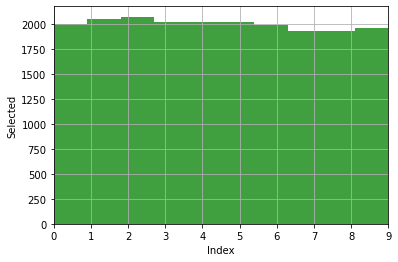

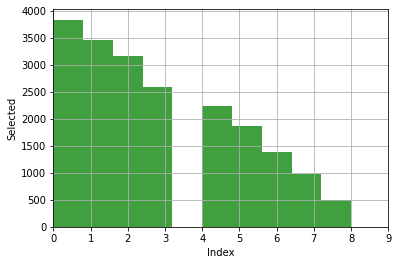

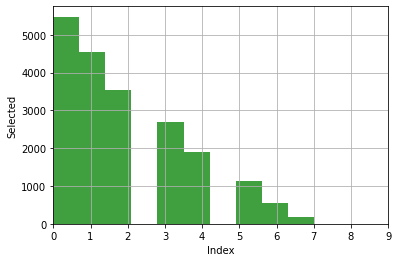

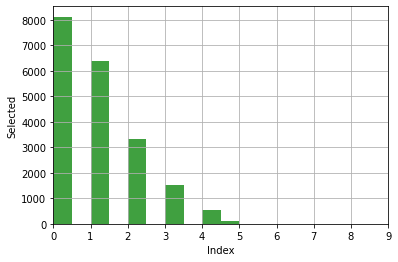

In [8]:
def testTournament(matingPoolSize, populationSize, K):
    testMatingPool = getMatingPool(matingPoolSize, populationSize, K)
    cm.displayHistogram(plt, np, testMatingPool, populationSize)
    
testTournament(10000, 10, 1)
testTournament(10000, 10, 2)
testTournament(10000, 10, 3)
testTournament(10000, 10, 5)

### 1.7) Crossover operator

Now, you are asked to implement the crossover operator. A and B are solutions (decision vectors). Let child be a new offspring solution (decision vector) and N is the number of cities.  Assume that the first N/2 elements of the child vector = the first N/2 elements of A, while the last N/2 elements of the child vector = the last N/2 elements of B. Obviously, such constructed solution may not be valid (use isValid) method. Repair this. You can, e.g., check (i) which indices are duplicated and (ii) which indices are missing. Then, you can replace one copy of each duplicate with one random missing index. 

In [9]:
def getCrossedOver(A, B):
    child = A.copy()
    N = len(A)

    for i in range(int(N/2), N):
        child[i] = B[i]
    if isValid(solution=child, cities=N): return child

    indices = set()
    seen = set()
    for i in range(N):
        if child[i] in seen:
            indices.add(i)
        else:
            seen.add(child[i])
    aset = set(A) - seen
    bset = set(B) - seen
    aset = aset.union(aset, bset)
    alist = list(aset)

    np.random.shuffle(alist)
    for i in indices:
        child[i] = alist.pop()
    
    if not isValid(child, N): print("CROSSOVER ERROR!")
    return child

### TEST
print(getCrossedOver([0,1,2,3,4,5],[0,1,3,4,2,4]))

[0, 1, 2, 4, 3, 5]


### 1.8) Mutation operator

Implement the mutation operator. Simply swap two different random cities (indices). Apply this mutation with a certain probability (input argument).

In [10]:
def mutate(solution, probability):
    if np.random.random() < probability:
        x,y = random.sample(range(0,len(solution)),2)
        solution[x],solution[y] = solution[y],solution[x]
    
for i in range(10):
    s= [0,1,2,3,4,5]
    mutate(s, 0.9)
    print(s)

[5, 1, 2, 3, 4, 0]
[0, 1, 3, 2, 4, 5]
[0, 1, 5, 3, 4, 2]
[2, 1, 0, 3, 4, 5]
[0, 1, 2, 5, 4, 3]
[0, 3, 2, 1, 4, 5]
[1, 0, 2, 3, 4, 5]
[0, 1, 2, 4, 3, 5]
[1, 0, 2, 3, 4, 5]
[5, 1, 2, 3, 4, 0]


### 1.9) Create offspring

Now, combine both operators. The below method should generate the offspring. For each pair of parent indices in matingPool, i.e., [index1, index2], take the corresponding solutions from the population and apply the crossover and mutation operators in order to generate a single offspring/child. Evaluate this solution, i.e., compute the total distance. Finally, add [distance, child] to children vector.   

In [11]:
def getOffspring(population, matingPool, mutationProbability, M):
    children = []
    for p1, p2 in matingPool:
        child = getCrossedOver(population[p1][1], population[p2][1])
        mutate(child, mutationProbability)
        children.append((getEvaluation(child, M), child))

    return children

### 1.10) Evolutionary Algorithm

Now, you are asked to combine all the previously completed methods into an evolutionary algorithm. This is the outline of the algorithm: <br>
1) Create  & evaluate an initial population of size "populationSize" <br>
2) Sort the population <br>
3) Construct a mating pool <br>
4) Generate  & evaluate an offspring of size "populationSize" <br>
5) Merge the current population and the offspring <br>
6) Sort such merged population <br>
7) Remove the worst half of the population or a better approach is to use tournament selection (run populationSize times) <br>
8) Go to (2) until the stopping criterion is not meet (repeat for the assumed number of generations) <br>

In each generation, compute & display the statistics concerning the current population. Finally, what is the best solution found by the method? Rerun the method for different parameters (e.g., population size) and check if you can improve the result.

## IMPORTANT REMARK
We wasted so much time trying to figure out what was the cause of a problem we stumbled upon. Namely, our final
population tended to practically always consist of the same, single individual, which dominated the set. The cause of
that was almost deterministic nature of the simple crossover we implemented. There's no mechanism for checking if a
given pair of parents was already chosen to make offspring. The simple crossover tends to make about exactly the same
offspring from exactly the same parents. That quickly leads to the problem we encountered, and that's why with just a
few generations, the set converges.

**This can be easily seen in the "extreme" section of no. of generations (just compare 1, 2, 3 and 5 generations)**

In [12]:
###
costMatrix = cm.getTutorialDistanceMatrix() ### 6 CITIES
cities = 6

def runEA(costMatrix, cities, mutationProbability, populationSize, generations, K):
    population = getInitialPopulation(populationSize, cities, costMatrix)
    sortPopulation(population)
    best = population[0]

    for g in range(generations):
        matingPool = getMatingPool(populationSize, populationSize, K)
        offspring = getOffspring(population, matingPool, mutationProbability, M)
        bigpop = population + offspring
        sortPopulation(bigpop)
        population = bigpop[0:populationSize]
        if best < population[0]:
            best = population[0]

    #printPopulation(population)
    print(getStats(population))
    print(best)
    return best, getStats(population)

# we can change these three
# mutationProbability = 1.0/6.0
# populationSize = 20
# generations = 50
print("\nno changes to parameters")
regular_result = runEA(costMatrix, cities, 1.0/6.0, 20, 50, int(np.ceil(50/8)))

print("\nno. of generations changes")
print("1")
runEA(costMatrix, cities, 1.0/6.0, 20, 1, int(np.ceil(25/8)))
print("2")
runEA(costMatrix, cities, 1.0/6.0, 20, 2, int(np.ceil(25/8)))
print("3")
runEA(costMatrix, cities, 1.0/6.0, 20, 3, int(np.ceil(25/8)))
print("5")
runEA(costMatrix, cities, 1.0/6.0, 20, 5, int(np.ceil(25/8)))
print("25")
runEA(costMatrix, cities, 1.0/6.0, 20, 25, int(np.ceil(25/8)))
print("50")
print(regular_result)
print("75")
runEA(costMatrix, cities, 1.0/6.0, 20, 75, int(np.ceil(75/8)))

print("\npopsize changes")
print("10")
runEA(costMatrix, cities, 1.0/6.0, 10, 50, int(np.ceil(50/8)))
print("20")
print(regular_result)
print("30")
runEA(costMatrix, cities, 1.0/6.0, 30, 50, int(np.ceil(50/8)))

print("\nmutation probability changes")
print("1/8")
runEA(costMatrix, cities, 1.0/8.0, 20, 50, int(np.ceil(50/8)))
print("1/6")
print(regular_result)
print("1/4")
runEA(costMatrix, cities, 1.0/4.0, 20, 50, int(np.ceil(50/8)))

print("\nK")
print("1/25 popsize")
runEA(costMatrix, cities, 1.0/6.0, 20, 50, int(np.ceil(50/25)))
print("1/12 popsize")
runEA(costMatrix, cities, 1.0/6.0, 20, 50, int(np.ceil(50/12)))
print("1/8")
print(regular_result)
print("1/4")
runEA(costMatrix, cities, 1.0/6.0, 20, 50, int(np.ceil(50/4)))


no changes to parameters
[236.28476553372587, 236.28476553372585, 236.28476553372587]
(295.29100312907104, [1, 5, 0, 2, 3, 4])

no. of generations changes
1
[247.50867124638637, 282.7669574557832, 313.806411032303]
(247.50867124638637, [3, 5, 0, 4, 1, 2])
2
[236.28476553372587, 255.79514659333623, 274.9930827056829]
(252.1415501768191, [1, 4, 3, 2, 5, 0])
3
[236.28476553372585, 237.96835139062495, 247.50867124638637]
(236.28476553372585, [3, 2, 1, 0, 5, 4])
5
[247.50867124638634, 247.5086712463863, 247.50867124638634]
(251.30378496171937, [2, 3, 5, 4, 0, 1])
25
[236.28476553372585, 236.28476553372585, 236.28476553372585]
(247.50867124638634, [2, 3, 5, 0, 4, 1])
50
((295.29100312907104, [1, 5, 0, 2, 3, 4]), [236.28476553372587, 236.28476553372585, 236.28476553372587])
75
[236.28476553372585, 236.28476553372585, 236.28476553372585]
(271.60170538510755, [5, 3, 2, 0, 1, 4])

popsize changes
10
[236.28476553372585, 236.28476553372587, 236.28476553372585]
(236.28476553372585, [2, 3, 4, 5, 0

((247.50867124638637, [5, 0, 4, 1, 2, 3]),
 [247.50867124638637, 247.5086712463863, 247.50867124638637])

# Part 2: Visualization of convergence

2.1) Now, change the data set (distance matrix) to cm.getLargeDistanceMatrix. This instance concerns 15 cities. Run the evolutionary algorithm with a population size of 20 and the number of generation of 200 (and suitably adjust the mutation probability - 1.0/15.0). 

**In each generation**, store the population statistics (min, mean, and max distances found, in, respectively, Y_MIN, Y_MEAN, Y_MAX). Then, use cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX) to display the convergence plot. Rerun the code for different parameters and observe the results. What is the best value (distance) you could find (print)?


different popsize:
503.98803249400896
408.8299097377533
392.562218073056

mutation probability changes:
453.3761063660723
424.4151287267764
404.22662689397674

K changes:
410.00440059821426
394.59216752860027
394.92832661057116


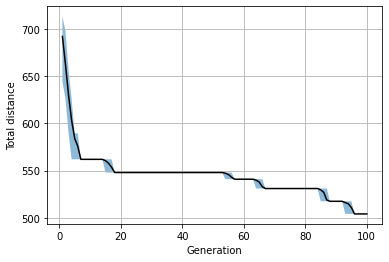

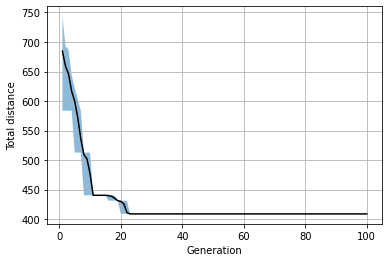

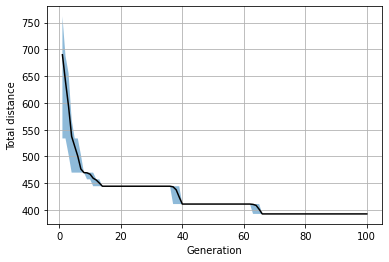

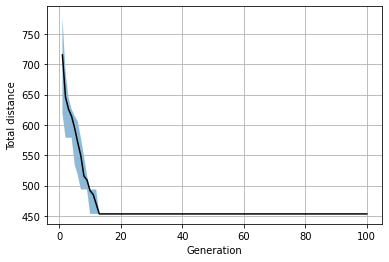

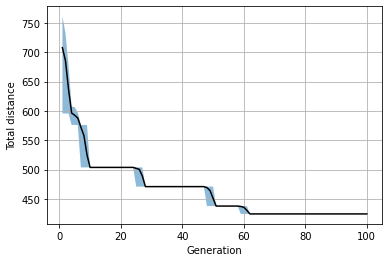

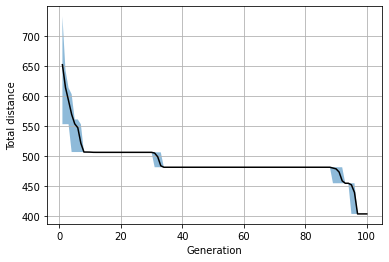

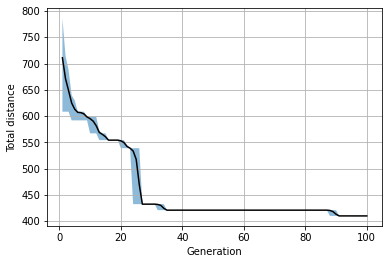

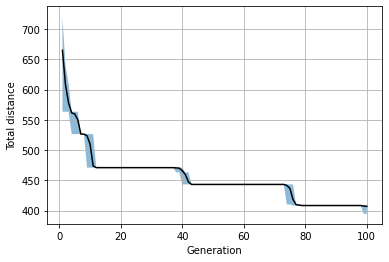

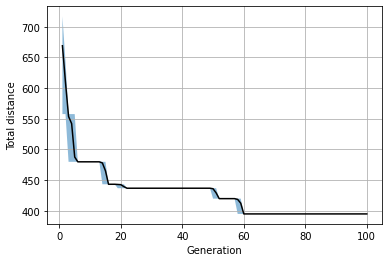

In [13]:
costMatrix = cm.getLargeDistanceMatrix() ### 15 CITIES
cities = 15
mutationProbability = 1.0/15.0
populationSize = 20
generations = 100
K = int(np.ceil(populationSize/8))

def runEAplot(costMatrix, cities, mutationProbability, populationSize, generations, K):
    X = []
    Y_MIN = []
    Y_MEAN = []
    Y_MAX = []
    population = getInitialPopulation(populationSize, cities, costMatrix)
    sortPopulation(population)

    for g in range(generations):
        matingPool = getMatingPool(populationSize, populationSize, K)
        offspring = getOffspring(population, matingPool, mutationProbability, costMatrix)
        bigpop = population + offspring
        sortPopulation(bigpop)
        population = bigpop[0:populationSize]

        stats = getStats(population)
        X.append(g+1)
        Y_MIN.append(stats[0])
        Y_MEAN.append(stats[1])
        Y_MAX.append(stats[2])

    cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX)
    print(Y_MIN[-1])

# we won't change the no. of generations, because then the plots would be difficult to compare

print("\ndifferent popsize:")
for popsize in [10, 20, 30]:
    runEAplot(costMatrix, cities, mutationProbability, popsize, generations, int(np.ceil(popsize/8)))

print("\nmutation probability changes:")
for mprob in [1.0/20.0, 1.0/15.0, 1.0/10.0]:
    runEAplot(costMatrix, cities, mprob, populationSize, generations, K)

print("\nK changes:")
for k in [int(np.ceil(popsize/12)), int(np.ceil(popsize/8)), int(np.ceil(popsize/4))]:
    runEAplot(costMatrix, cities, mutationProbability, populationSize, generations, k)

2.2) Each time you rerun the code, while keeping the parameter values fixed, the results may slightly change. This is due to the random nature of evolutionary algorithms. Hence, in order to get the reliable results, the method must be run several times and the results have to be averaged. Do the following:<br>
- run the method 20 times <br>
- in each run: capture **the best result found** throughout evolutionary search (i.e., in each generation) <br>
- for each generation: find min, mean, and max value over **20 independent runs** <br>
- use cm.plotConvergence to display the convergence
- print the best value ever found 


different popsize:
popsize = 10
220.3896931721556
popsize = 20
214.08460306311906
popsize = 30
202.7101510253498

mutation probability changes:
mprob = 0.05
160.26988981400157
mprob = 0.06666666666666667
156.4922540038202
mprob = 0.1
132.30811270033595

K changes:
K = 3
198.9974497193334
K = 4
212.36333766539482
K = 8
210.29628996264992


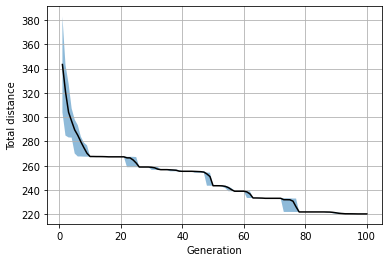

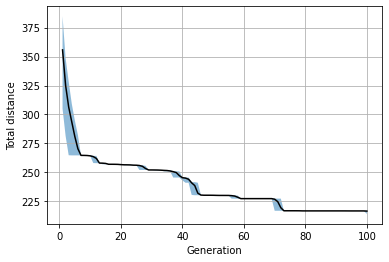

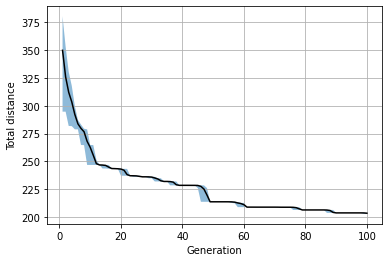

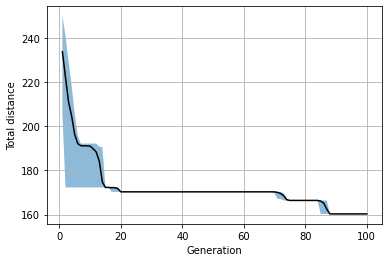

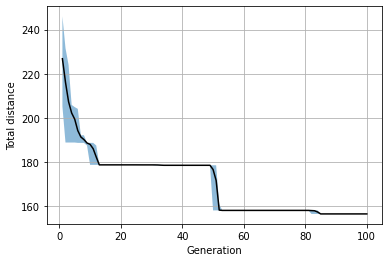

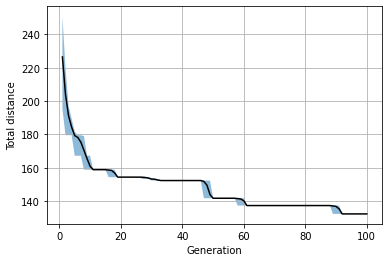

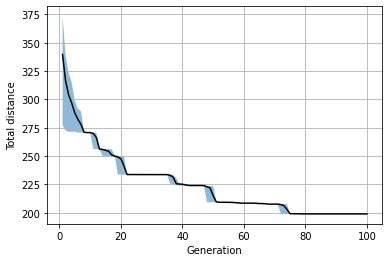

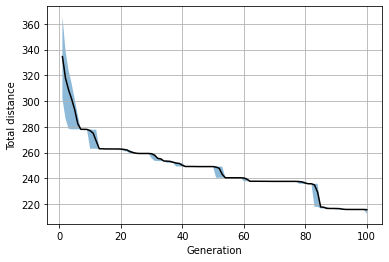

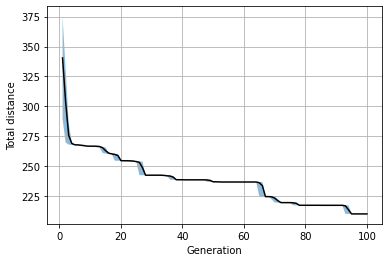

In [14]:
X = [i+1 for i in range(generations)]

def runEAmean(costMatrix, cities, mutationProbability, populationSize, generations, K):
    Y_MIN = []
    Y_MEAN = []
    Y_MAX = []
    population = getInitialPopulation(populationSize, cities, costMatrix)
    sortPopulation(population)
    best = (np.inf, [])

    for g in range(generations):
        matingPool = getMatingPool(populationSize, populationSize, K)
        offspring = getOffspring(population, matingPool, mutationProbability, costMatrix)
        bigpop = population + offspring
        sortPopulation(bigpop)
        population = bigpop[0:populationSize]

        stats = getStats(population)
        Y_MIN.append(stats[0])
        Y_MEAN.append(stats[1])
        Y_MAX.append(stats[2])
        if best > population[0]:
            best = population[0]

    return Y_MIN, Y_MEAN, Y_MAX, best

# we won't change the no. of generations, because then the plots would be difficult to compare

print("\ndifferent popsize:")
values = [10, 20, 30]
yminmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymeanmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymaxmean = [[0.0 for j in range(generations)] for k in range(len(values))]
bestmean = [0.0 for k in range(len(values))]
for i in range(20):
    ymin = []
    ymean = []
    ymax = []
    best = []
    for popsize in values:
        result = runEAmean(costMatrix, cities, mutationProbability, popsize, generations, int(np.ceil(popsize/8)))
        ymin.append(result[0])
        ymean.append(result[1])
        ymax.append(result[2])
        best.append(result[3])
    # calculate means
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] += ymin[j][k]
            ymeanmean[j][k] += ymean[j][k]
            ymaxmean[j][k] += ymax[j][k]
        bestmean[j] += best[j][0]
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] /= len(ymin)
            ymeanmean[j][k] /= len(ymean)
            ymaxmean[j][k] /= len(ymax)
        bestmean[j] /= len(best)
for j in range(len(values)):
    print("popsize = {}".format(values[j]))
    print(bestmean[j])
    cm.plotConvergence(plt, X, yminmean[j], ymeanmean[j], ymaxmean[j])

print("\nmutation probability changes:")
values = [1.0/20.0, 1.0/15.0, 1.0/10.0]
yminmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymeanmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymaxmean = [[0.0 for j in range(generations)] for k in range(len(values))]
bestmean = [0.0 for k in range(len(values))]
for i in range(20):
    ymin = []
    ymean = []
    ymax = []
    best = []
    for mprob in values:
        result = runEAmean(costMatrix, cities, mprob, populationSize, generations, int(np.ceil(populationSize/8)))
        ymin.append(result[0])
        ymean.append(result[1])
        ymax.append(result[2])
        best.append(result[3])
    # calculate means
    yminmean = [[0.0 for j in range(generations)] for k in range(len(ymin))]
    ymeanmean = [[0.0 for j in range(generations)] for k in range(len(ymean))]
    ymaxmean = [[0.0 for j in range(generations)] for k in range(len(ymax))]
    bestmean = [0.0 for k in range(len(best))]
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] += ymin[j][k]
            ymeanmean[j][k] += ymean[j][k]
            ymaxmean[j][k] += ymax[j][k]
        bestmean[j] += best[j][0]
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] /= len(ymin)
            ymeanmean[j][k] /= len(ymean)
            ymaxmean[j][k] /= len(ymax)
        bestmean[j] /= len(best)
for j in range(len(values)):
    print("mprob = {}".format(values[j]))
    print(bestmean[j])
    cm.plotConvergence(plt, X, yminmean[j], ymeanmean[j], ymaxmean[j])

print("\nK changes:")
values = [int(np.ceil(popsize/12)), int(np.ceil(popsize/8)), int(np.ceil(popsize/4))]
yminmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymeanmean = [[0.0 for j in range(generations)] for k in range(len(values))]
ymaxmean = [[0.0 for j in range(generations)] for k in range(len(values))]
bestmean = [0.0 for k in range(len(values))]
for i in range(20):
    ymin = []
    ymean = []
    ymax = []
    best = []
    for k in values:
        result = runEAmean(costMatrix, cities, mutationProbability, populationSize, generations, k)
        ymin.append(result[0])
        ymean.append(result[1])
        ymax.append(result[2])
        best.append(result[3])
    # calculate means
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] += ymin[j][k]
            ymeanmean[j][k] += ymean[j][k]
            ymaxmean[j][k] += ymax[j][k]
        bestmean[j] += best[j][0]
    for j in range(len(ymin)):
        for k in range(generations):
            yminmean[j][k] /= len(ymin)
            ymeanmean[j][k] /= len(ymean)
            ymaxmean[j][k] /= len(ymax)
        bestmean[j] /= len(best)

for j in range(len(values)):
    print("K = {}".format(values[j]))
    print(bestmean[j])
    cm.plotConvergence(plt, X, yminmean[j], ymeanmean[j], ymaxmean[j])

# Part 3: Impact of different parameter values on the optimization

In this exercise, you are asked to check how the method performs when involving different parameter values. Firtly, we wish to plot several convergence plots in a single chart. For this reason, you may copy & paste the cm.plotConvergence function (from common.py) and modify it. Then, copy & paste the code you completed in the previous exercise (the one which averages 20 trial runs). <br> Add legend (plt.legend() in the end of plotConvergence2) and add label to function ax.plot. Then: 
- Firsty, evaluate the performance in terms of different population sizes. Specifically, check how the method performs for the population size = 5, 10, 20, and 50. Display 4 convergence plots in a signle chart. 
- Secondly, evaluate the performance in terms of different tournament sizes. Specifically, check how the method performs for the tournament size = 1, 2, 5, and 15. Display 4 convergence plots in a signle chart. <br>

Briefly describe both charts.

In [15]:
def plotConvergence2(plt, X, Y_MINs, Y_MEANs, Y_MAXs, parameter_values):
    ### TODO

IndentationError: expected an indented block (Temp/ipykernel_13724/2411765635.py, line 2)

In [ ]:
### TODO (POPULATION SIZE)


In [ ]:
### TODO (TOURNAMENT SIZE)
